In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("headbrain.csv")

In [3]:
X = df['Head Size(cm^3)'].values
y = df['Brain Weight(grams)'].values

In [16]:
X[:5]

array([4512, 3738, 4261, 3777, 4177], dtype=int64)

In [17]:
y[:5]

array([1530, 1297, 1335, 1282, 1590], dtype=int64)

In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [20]:
minmax = MinMaxScaler()
X = minmax.fit_transform(X.reshape(-1,1))

In [21]:
y = minmax.fit_transform(y.reshape(-1,1))

In [22]:
X[:5],y[:5]

(array([[0.88406512],
        [0.50222003],
        [0.7602368 ],
        [0.52146029],
        [0.71879625]]),
 array([[0.84558824],
        [0.50294118],
        [0.55882353],
        [0.48088235],
        [0.93382353]]))

In [53]:
epochs = 500
alpha = 0.01

In [54]:
n = len(X)

def cost_function(X,y,slope,inter):
    mse = np.sum(((slope * X + inter) - y) ** 2) / n
    return mse

In [55]:
def gradient(X,y):
    slope = 0
    inter = 0
    cost_history = []
    for epoch in range(epochs):
        y_pred = slope * X + inter
        loss = y_pred - y
        grad_slope = (2/n) * loss.T.dot(X)
        grad_inter = (2/n) * np.sum(loss)
        slope = slope - grad_slope * alpha
        inter = inter - grad_inter * alpha
        err = cost_function(X,y,slope,inter)
        cost_history.append(err)
        print("Epoch : {} Loss : {}".format(epoch,err))
    return slope, inter, cost_history

In [56]:
slope, inter, errors = gradient(X,y)

Epoch : 0 Loss : 0.2521547322319294
Epoch : 1 Loss : 0.24118757108939773
Epoch : 2 Loss : 0.23074375045614173
Epoch : 3 Loss : 0.2207982701063233
Epoch : 4 Loss : 0.21132732411574207
Epoch : 5 Loss : 0.20230824380806392
Epoch : 6 Loss : 0.19371944342660288
Epoch : 7 Loss : 0.18554036840145188
Epoch : 8 Loss : 0.17775144608797896
Epoch : 9 Loss : 0.17033403885862697
Epoch : 10 Loss : 0.1632703994355961
Epoch : 11 Loss : 0.1565436283573585
Epoch : 12 Loss : 0.15013763347706752
Epoch : 13 Loss : 0.14403709139579587
Epoch : 14 Loss : 0.13822741073817166
Epoch : 15 Loss : 0.1326946971823983
Epoch : 16 Loss : 0.1274257201608485
Epoch : 17 Loss : 0.1224078811514262
Epoch : 18 Loss : 0.1176291834837028
Epoch : 19 Loss : 0.11307820358746418
Epoch : 20 Loss : 0.1087440636147627
Epoch : 21 Loss : 0.10461640536985901
Epoch : 22 Loss : 0.10068536548457388
Epoch : 23 Loss : 0.0969415517795548
Epoch : 24 Loss : 0.09337602075480382
Epoch : 25 Loss : 0.08998025615552073
Epoch : 26 Loss : 0.086746148561

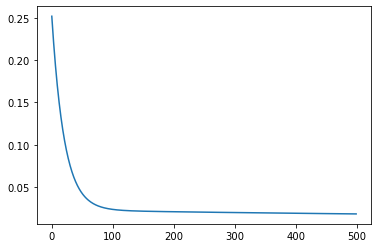

In [57]:
plt.plot(list(range(epochs)), errors)

In [58]:
slope, inter

(array([[0.3279096]]), 0.3399744625145471)

In [59]:
predictions = []
for i in range(len(X)):
    y_pred = slope * X[i] + inter
    predictions.append(y_pred[0][0])

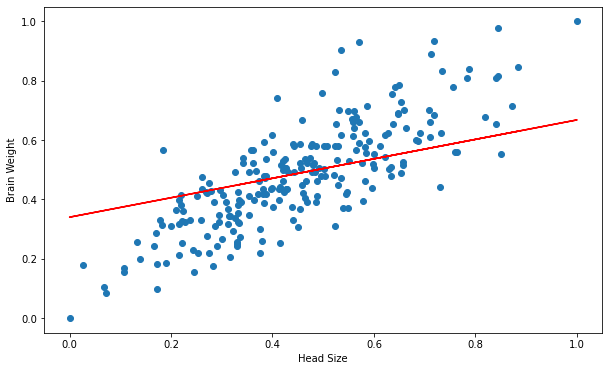

In [60]:
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,predictions,'r')
plt.xlabel("Head Size")
plt.ylabel("Brain Weight")
plt.show()